# Live-State Analysis

Analysis of the results of running EF/CF on live-state exports of contracts discovered
to be vulnerable in some prior study

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [6]:
def normalize_ethereum_address(a):
    if not isinstance(a, int):
        a = int(a, 0)
    return f"{a:#042x}"

In [7]:
known_honeypots = pd.read_csv("./known_honeypots.csv")
known_honeypots.drop(known_honeypots.index[known_honeypots['Positive'] != True], inplace=True)
known_honeypots['Address'] = known_honeypots['Address'].map(normalize_ethereum_address)

In [8]:
def sanitize_wallclocktime(s):
#     print(s)
    if isinstance(s, float):
        return None
    i = s.find(".")
    s = s[:i]
    if s.count(":") < 2:
        s = f"00:{s}"
    return s.strip()

WALLCLOCK = 'wall clock time (h:)m:ss'

# EthBMC Vuln

In [9]:
ethbmcvuln = pd.read_csv("./ethbmc-vuln.summary.csv")
ethbmcvuln[WALLCLOCK] = ethbmcvuln[WALLCLOCK].map(sanitize_wallclocktime)
ethbmcvuln[WALLCLOCK] = pd.to_timedelta(ethbmcvuln[WALLCLOCK])
ethbmcvuln['contract'] = ethbmcvuln['contract'].map(normalize_ethereum_address)
ethbmcvuln

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
0,0xf2160f59910011efb571676114fb78207521385f,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x000417937ea0286b9dc650274aaafcc7e3e7aedf,success,0 days 00:00:00,live-state,False,308.0,4800.0,[BUG] selfdestruct DoS | selfdestruct to addre...,66.666667,0.500,29.0,0.0,1.0,1.0,2.0,2.0,4800.000000,154.00,0:00.45
2,0x0013e723f574bafd47cc1542532cdcd98c1c2989,success,0 days 00:00:00,live-state,False,80.0,6009.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.000,41.0,0.0,0.0,1.0,1.0,1.0,6009.000000,80.00,0:00.44
3,0x001f1df70e3c0c2ace58b7244fe502e3ce3f9bf4,success,0 days 00:00:00,live-state,False,1522.0,2089.0,[BUG] selfdestruct DoS | selfdestruct to addre...,83.050847,1.375,26.0,0.0,11.0,1.0,8.0,5.0,2089.000000,190.25,0:00.24
4,0x002444b927fbe4a4b6bbb051480e1c3be3086b55,success,0 days 00:00:54,live-state,False,863.0,843382.0,[BUG] balance gain | 3766261041232008458301473...,83.333333,0.000,259.0,54.0,0.0,1.0,1.0,2.0,15618.185185,863.00,0:54.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,0xff57eb6e6a7a9ca839852514c3dbcacfdef306a4,success,0 days 00:01:42,live-state,False,328.0,1102913.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,319.0,102.0,1.0,1.0,2.0,1.0,10812.872549,252.00,1:42.07
2840,0xff8e1fda648b8eca0940ced9a2d70390168be0c0,success,0 days 00:00:21,live-state,False,328.0,246585.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,219.0,21.0,1.0,1.0,2.0,1.0,11742.142857,252.00,0:21.83
2841,0xffc5a921f7f5c11e8e4046796378542d6ba33254,success,0 days 00:00:00,live-state,False,2281.0,2221.0,[BUG] selfdestruct DoS | selfdestruct to addre...,73.684211,4.500,27.0,0.0,9.0,1.0,2.0,4.0,2221.000000,1140.50,0:00.24
2842,0xffc620908fdab9629302a9577907453276124e22,success,0 days 00:00:09,live-state,False,328.0,159430.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,202.0,9.0,1.0,1.0,2.0,1.0,17714.444444,252.00,0:09.18


In [10]:
ethbmcvuln['run_unix'].describe()

count    2843.000000
mean       28.561027
std       111.432364
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max      1200.000000
Name: run_unix, dtype: float64

ethbmc-vuln processed: 2846 bugs: 2802 destructed: 10 rpc-issue:3

In [11]:
ethbmcvuln[ethbmcvuln['bugs'].isnull()]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
0,0xf2160f59910011efb571676114fb78207521385f,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,0x318a74cfb30fbc1747a60e9fd4dbc034d00da04d,success,0 days 00:20:00,live-state,True,3515.0,13831494.0,NaN,85.606061,1.500000,522.0,1200.0,3.0,1.0,2.0,NaN,11526.245000,1757.500000,20:00.04
585,0x357f216e0aab7046fb5e22a3e29c0ac19aa625ea,success,0 days 00:20:00,live-state,False,11593.0,180550.0,NaN,55.311355,790.125000,245.0,1200.0,4737.0,1.0,8.0,NaN,150.458333,3397.500000,20:00.40
592,0x3648ac92cf840488f5188fa3faa9091b651b4d92,success,0 days 00:20:00,live-state,False,7219.0,14950465.0,NaN,69.642857,5.500000,724.0,1200.0,11.0,1.0,2.0,NaN,12458.720833,3609.500000,20:00.06
639,0x3c5a3436a52c65eb64613a2c345f90ba2899271e,success,0 days 00:20:00,live-state,False,9138.0,588201.0,NaN,78.787879,330.333333,149.0,1200.0,1976.0,1.0,6.0,NaN,490.167500,1672.000000,20:00.11
669,0x3e2bdb6b4545df4eb7547f8b8bd8a11bb29c1650,success,0 days 00:20:00,live-state,False,5524.0,136717.0,NaN,34.821429,2.000000,296.0,1200.0,4.0,1.0,2.0,NaN,113.930833,2762.000000,20:00.04
706,0x410b6d66bb9236bc524f46af4150aa5e16b49bbd,success,0 days 00:20:00,live-state,False,4754.0,4708708.0,NaN,93.373494,0.000000,1169.0,1200.0,0.0,1.0,1.0,NaN,3923.923333,4754.000000,20:00.04
1201,0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1,success,0 days 00:20:00,live-state,False,6837.0,7382199.0,NaN,76.125245,37.500000,1167.0,1200.0,75.0,1.0,2.0,NaN,6151.832500,3418.500000,20:00.12
1202,0x6ec9c5ba13c3eff74e5c0cd253be4a026a6ce6f2,success,0 days 00:20:00,live-state,False,4996.0,16472392.0,NaN,71.367521,4.000000,655.0,1200.0,8.0,1.0,2.0,NaN,13726.993333,2498.000000,20:00.03
1388,0x7eae8e15f0a3380226ee351e32dc2e717d242463,success,0 days 00:20:00,live-state,False,4456.0,997700.0,NaN,92.307692,0.000000,759.0,1200.0,0.0,1.0,1.0,NaN,831.416667,4456.000000,20:00.10


In [12]:
ethbmcvuln['abi'].value_counts()

False    2828
True       16
Name: abi, dtype: int64

In [13]:
ethbmcvuln[~ethbmcvuln['bugs'].isnull()]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
1,0x000417937ea0286b9dc650274aaafcc7e3e7aedf,success,0 days 00:00:00,live-state,False,308.0,4800.0,[BUG] selfdestruct DoS | selfdestruct to addre...,66.666667,0.500,29.0,0.0,1.0,1.0,2.0,2.0,4800.000000,154.00,0:00.45
2,0x0013e723f574bafd47cc1542532cdcd98c1c2989,success,0 days 00:00:00,live-state,False,80.0,6009.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.000,41.0,0.0,0.0,1.0,1.0,1.0,6009.000000,80.00,0:00.44
3,0x001f1df70e3c0c2ace58b7244fe502e3ce3f9bf4,success,0 days 00:00:00,live-state,False,1522.0,2089.0,[BUG] selfdestruct DoS | selfdestruct to addre...,83.050847,1.375,26.0,0.0,11.0,1.0,8.0,5.0,2089.000000,190.25,0:00.24
4,0x002444b927fbe4a4b6bbb051480e1c3be3086b55,success,0 days 00:00:54,live-state,False,863.0,843382.0,[BUG] balance gain | 3766261041232008458301473...,83.333333,0.000,259.0,54.0,0.0,1.0,1.0,2.0,15618.185185,863.00,0:54.06
5,0x005a4dd900ecc1b792f0c729342c4111426db7e0,success,0 days 00:00:00,live-state,False,2398.0,2469.0,[BUG] selfdestruct DoS | selfdestruct to addre...,81.609195,1.500,61.0,0.0,3.0,1.0,2.0,4.0,2469.000000,1199.00,0:00.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,0xff57eb6e6a7a9ca839852514c3dbcacfdef306a4,success,0 days 00:01:42,live-state,False,328.0,1102913.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,319.0,102.0,1.0,1.0,2.0,1.0,10812.872549,252.00,1:42.07
2840,0xff8e1fda648b8eca0940ced9a2d70390168be0c0,success,0 days 00:00:21,live-state,False,328.0,246585.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,219.0,21.0,1.0,1.0,2.0,1.0,11742.142857,252.00,0:21.83
2841,0xffc5a921f7f5c11e8e4046796378542d6ba33254,success,0 days 00:00:00,live-state,False,2281.0,2221.0,[BUG] selfdestruct DoS | selfdestruct to addre...,73.684211,4.500,27.0,0.0,9.0,1.0,2.0,4.0,2221.000000,1140.50,0:00.24
2842,0xffc620908fdab9629302a9577907453276124e22,success,0 days 00:00:09,live-state,False,328.0,159430.0,[BUG] balance gain | 3766261041232008458301473...,100.000000,0.500,202.0,9.0,1.0,1.0,2.0,1.0,17714.444444,252.00,0:09.18


In [14]:
ethbmcvuln[ethbmcvuln['bugs'].isnull() & ~ethbmcvuln['execs_per_sec'].isnull()]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
542,0x318a74cfb30fbc1747a60e9fd4dbc034d00da04d,success,0 days 00:20:00,live-state,True,3515.0,13831494.0,NaN,85.606061,1.500000,522.0,1200.0,3.0,1.0,2.0,NaN,11526.245000,1757.500000,20:00.04
585,0x357f216e0aab7046fb5e22a3e29c0ac19aa625ea,success,0 days 00:20:00,live-state,False,11593.0,180550.0,NaN,55.311355,790.125000,245.0,1200.0,4737.0,1.0,8.0,NaN,150.458333,3397.500000,20:00.40
592,0x3648ac92cf840488f5188fa3faa9091b651b4d92,success,0 days 00:20:00,live-state,False,7219.0,14950465.0,NaN,69.642857,5.500000,724.0,1200.0,11.0,1.0,2.0,NaN,12458.720833,3609.500000,20:00.06
639,0x3c5a3436a52c65eb64613a2c345f90ba2899271e,success,0 days 00:20:00,live-state,False,9138.0,588201.0,NaN,78.787879,330.333333,149.0,1200.0,1976.0,1.0,6.0,NaN,490.167500,1672.000000,20:00.11
669,0x3e2bdb6b4545df4eb7547f8b8bd8a11bb29c1650,success,0 days 00:20:00,live-state,False,5524.0,136717.0,NaN,34.821429,2.000000,296.0,1200.0,4.0,1.0,2.0,NaN,113.930833,2762.000000,20:00.04
706,0x410b6d66bb9236bc524f46af4150aa5e16b49bbd,success,0 days 00:20:00,live-state,False,4754.0,4708708.0,NaN,93.373494,0.000000,1169.0,1200.0,0.0,1.0,1.0,NaN,3923.923333,4754.000000,20:00.04
1201,0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1,success,0 days 00:20:00,live-state,False,6837.0,7382199.0,NaN,76.125245,37.500000,1167.0,1200.0,75.0,1.0,2.0,NaN,6151.832500,3418.500000,20:00.12
1202,0x6ec9c5ba13c3eff74e5c0cd253be4a026a6ce6f2,success,0 days 00:20:00,live-state,False,4996.0,16472392.0,NaN,71.367521,4.000000,655.0,1200.0,8.0,1.0,2.0,NaN,13726.993333,2498.000000,20:00.03
1388,0x7eae8e15f0a3380226ee351e32dc2e717d242463,success,0 days 00:20:00,live-state,False,4456.0,997700.0,NaN,92.307692,0.000000,759.0,1200.0,0.0,1.0,1.0,NaN,831.416667,4456.000000,20:00.10
1526,0x89e315a597dfce24b15197a450dff66db62dd3cb,success,0 days 00:20:00,live-state,False,808.0,57737.0,NaN,75.609756,2.000000,78.0,1200.0,3.0,1.0,2.0,NaN,48.114167,749.000000,20:00.53


In [15]:
len(ethbmcvuln[ethbmcvuln['bugs'].isnull() & ~ethbmcvuln['execs_per_sec'].isnull()])

18

In [16]:
ethbmcvuln[ethbmcvuln['bugs'].isnull() & ~ethbmcvuln['execs_per_sec'].isnull() & ethbmcvuln['abi']]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
542,0x318a74cfb30fbc1747a60e9fd4dbc034d00da04d,success,0 days 00:20:00,live-state,True,3515.0,13831494.0,NaN,85.606061,1.5,522.0,1200.0,3.0,1.0,2.0,NaN,11526.2450,1757.5,20:00.04
2271,0xcb2ab9fdb42de8955987304009494ee4c2a08852,success,0 days 00:20:02,live-state,True,3628.0,140103.0,NaN,79.279279,5824.0,132.0,1200.0,11648.0,1.0,2.0,NaN,116.7525,1814.0,20:02.15


In [17]:
ethbmcvuln[ethbmcvuln['bugs'].isnull() & ethbmcvuln['execs_per_sec'].isnull()]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_max_code_size,execs,bugs,coverage,state_average_storage_size,queue,run_unix,state_max_storage_size,bugtypes,state_accounts,crashes,execs_per_sec,state_average_code_size,wall clock time (h:)m:ss.1
0,0xf2160f59910011efb571676114fb78207521385f,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
missedbugs = set(ethbmcvuln[ethbmcvuln['bugs'].isnull() & ~ethbmcvuln['execs_per_sec'].isnull()]['contract'])
len(missedbugs)

18

In [19]:
100 - ((len(missedbugs) / len(ethbmcvuln)))

99.99367088607595

In [20]:
duplicates = set(map(normalize_ethereum_address, [
    # 0x15301040fce5f3afed97652d6940527f57a9b2dc
    0x499fcf3b8bce21f0969bad81f30d28f1ec1ca974,
    0x63b2ffc79cb3c9667fa16df4d0e0804dbe907093,
    0x754c943afee904d10edce0778697159f6801e16d,
    
    # 0xd2c5c0d51c8d97d0deb0a5efa416de90600db62d
    0xdb18915037142ca69180cc128f1aff4021fd3fd9,
]))

In [21]:
mb = "\n".join(missedbugs - duplicates)
with open("./ethbmc-missedbugs-contracts.txt", "w") as f:
    f.write(mb)

In [22]:
# these are reproducable in EF/CF environment with some effort of adapting the tx sequence
reproducable_in_efcf = set(map(normalize_ethereum_address,[
    # maybe due to lack of ABI, less efficient? reproducible in efcf framework
    0x3E2bdB6B4545Df4eB7547F8B8Bd8A11bb29c1650,
    # not sure what is going on here
    0x410b6d66bb9236bc524f46af4150aa5e16b49bbd,
    
    # reproducible in efcf framework
    0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1,
    
    # ethbmc seed directly crashes
    0x3c5a3436a52c65eb64613a2c345f90ba2899271e,
    0xccfaee7dd7e330960d5241a980415cc94dbe59a4,
    0xe1a7f57ce21f58d6f55939900809800dce699b8b,
    
    # by manually adapting the seed it works
    0x3e2bdb6b4545df4eb7547f8b8bd8a11bb29c1650,
    
    # these worked after seeding with ethbmc inputs and fuzzing for a bit
    0x89e315a597dfce24b15197a450dff66db62dd3cb,
    0x9c3fae2ab9c0079854dc3ab5808afbc4c4fa62ed,
    0x3648ac92cf840488f5188fa3faa9091b651b4d92,
    0xcbcff2b9723ad8db38ba826af611e35bbbfc7ce3,
    0xf57f51d516c1ba009482082811d86fea0fc22fcb,
    0x3e2bdb6b4545df4eb7547f8b8bd8a11bb29c1650,
    
    # seems vulnerable, but also extremely strange. worked after fuzzing the ethbmc seed for a bit (need a lot of initial_ether)
    # https://contract-library.com/contracts/Ethereum/7eae8e15f0a3380226ee351e32dc2e717d242463?line=133
    0x7eae8E15F0a3380226eE351e32dC2e717d242463,
]))

# these cannot be reproduced in the environment of EF/CF - likely false alarms
not_reproduceable_in_efcf = set(map(normalize_ethereum_address, [
    # strange: cannot reproduce the bug in ef/cf environment (same exported block)
    # not sure why.
    # has source code available, but looks good?
    # https://etherscan.io/address/318A74CFB30FBC1747A60E9FD4DBC034D00DA04D#code
    # might be a false alarm in ethbmc or an error with the dataset?
    0x318a74cfb30fbc1747a60e9fd4dbc034d00da04d,
    
    0x6ec9c5ba13c3eff74e5c0cd253be4a026a6ce6f2,
    
    # these two seem to be duplicates (i.e., EthBMC)
    0x95EEDBA9114D72FDCA00BA821EFA883AF189B112,
    0xa1ec098c32bde89a29c330e62faa62f3fccce64e,
    
    # weird pattern: transferFrom with bogus parameters, withdraw()
    0xCB2AB9FDB42DE8955987304009494EE4C2A08852,
]))

# we do not know what is going on with these:
weird_af = set(map(normalize_ethereum_address, [
    
]))

# these work in EF/CF by just using the very same block as ethbmc
block_different = set(map(normalize_ethereum_address, [   
    # invest() -> divest(uint) found - similar to ethbmc which finds invest() -> divest()
    0x357f216e0aab7046fb5e22a3e29c0ac19aa625ea,

    # ef/cf finds the same selfdestruct sequence
    0xf57f51d516c1ba009482082811d86fea0fc22fcb,
    
    # same tx sequences, but only after 34 minutes in one of the runs
    0x9c3fae2ab9c0079854dc3ab5808afbc4c4fa62ed,
    
    # finds other tx sequences, but the last function is always `returnDeposit()` in both ethbmc and efcf
    0x3648ac92cf840488f5188fa3faa9091b651b4d92,
    
]))

# analyze the remaining contracts:
missedbugs - block_different - reproducable_in_efcf - not_reproduceable_in_efcf - weird_af

set()

In [23]:
print(f"""
reproducable_in_efcf: {len(reproducable_in_efcf)}
not_reproduceable_in_efcf: {len(not_reproduceable_in_efcf)}
block_different: {len(block_different)}
""")


reproducable_in_efcf: 12
not_reproduceable_in_efcf: 5
block_different: 4



# Potential False Alarms in EthBMC

### 0xCB2AB9FDB42DE8955987304009494EE4C2A08852

This one has code on [etherscan](https://etherscan.io/address/CB2AB9FDB42DE8955987304009494EE4C2A08852#code). It seems to be a quite similar case than the other below. The EthBMC generated attack sequence does not make a whole lot of sense.

```
TX[0] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  func: transferFrom(address,address,uint256):(bool) (0x23b872dd)
  input: { Address(0x0000000000000000000000000000000080000000), Address(0x0000000000000000000000000000000080000000), Uint(0),  }
```

This is the first transaction, which triggers the transferFrom function with a value of 0, which essentially does nothing but create storage addresses?

```solidity
  function transferFrom(address _from, /* 0x80000000 */
                        address _to, /* 0x80000000 */
                        uint _value) /* 0x0 */
                        public returns (bool success) {
      //same as above. Replace this line with the following if you want to protect against wrapping uints.
      //require(balances[_from] >= _value && allowed[_from][msg.sender] >= _value && balances[_to] + _value > balances[_to]);
      require(balances[_from] >= _value && allowed[_from][msg.sender] >= _value);
      balances[_to] += _value;
      balances[_from] -= _value;
      allowed[_from][msg.sender] -= _value;
      Transfer(_from, _to, _value);
      return true;
  }
```


next follows the withdraw function

```
TX[1] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  func: withdraw(uint256) (0x2e1a7d4d)
  input: { Uint(2),  }
```

However, this can only be triggered by the owner? this is weird.

```solidity
modifier onlyOwner() {
    require(msg.sender == owner);
    _;
}
function withdraw(uint _amount) public onlyOwner {
    owner.transfer(_amount);
}
```


### 0x95EEDBA9114D72FDCA00BA821EFA883AF189B112

(same issue with 0xa1ec098c32bde89a29c330e62faa62f3fccce64e, which seems to be a duplicate)

first generated attack tx sequence by EthBMC:

```
TX[0] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0x23b872dd
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
```

which triggers the following function (decompiled with panoramix); this input does not make a whole lot of sense? Except maybe it creates some storage address that does not exist before?

```python
def transferFrom(address _from,  # 0x80000000
                 address _to,    # 0x80000000
                 uint256 _value  # 0x0
                 ): # not payable
  require balances[addr(_from)] >= _value
  require balances[addr(_to)] + _value >= balances[addr(_to)]
  require _value <= allowance[addr(_from)][caller]
  balances[addr(_from)] -= _value
  balances[addr(_to)] += _value
  allowance[addr(_from)][caller] -= _value
  log Transfer(
        address from=_value,
        address to=_from,
        uint256 tokens=_to)
  return 1
```

Second transaction with a lot of useless parameters?

```
TX[1] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0xc885bc58
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000080000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
```

```python
def withdrawReward(): # not payable
  # ok let's say this passes
  require block.timestamp >= deadline + (720 * 24 * 3600)
  if block.timestamp < deadline:
      require currentStage >= 2
    
  # this should always revert, no? there can be no prior balance?
  require balances[caller]
  if stor17[caller].field_512 >= lastDivideRewardTime:
      return 0
  require unknown44cb9d03
  if stor17[caller].field_768 > lastDivideRewardTime:
      if not stor16 * stor17[caller].field_256 / unknown44cb9d03:
          return 0
      call caller with:
         value stor16 * stor17[caller].field_256 / unknown44cb9d03 wei
           gas 2300 * is_zero(value) wei
      require ext_call.success
      if balances[caller]:
          stor17[caller].field_512 = block.timestamp
      else:
          stor17[caller].field_0 = 0
          stor17[caller].field_256 = 0
          stor17[caller].field_512 = 0
          stor17[caller].field_768 = 0
      return (stor16 * stor17[caller].field_256 / unknown44cb9d03)
  if not stor16 * balances[caller] / unknown44cb9d03:
      return 0
  call caller with:
     value stor16 * balances[caller] / unknown44cb9d03 wei
       gas 2300 * is_zero(value) wei
  require ext_call.success
  if balances[caller]:
      stor17[caller].field_512 = block.timestamp
  else:
      stor17[caller].field_0 = 0
      stor17[caller].field_256 = 0
      stor17[caller].field_512 = 0
      stor17[caller].field_768 = 0
  return (stor16 * balances[caller] / unknown44cb9d03)

```

there is also a second longer transaction sequences generated by EthBMC, with two times the same? Also does not make a whole lot of sense.

```
TX[0] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0x23b872dd
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
TX[1] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0xc885bc58
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000080000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
TX[2] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0x23b872dd
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
TX[3] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=2
  sig: 0xc885bc58
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000080000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000

```


### 0x6ec9c5ba13c3eff74e5c0cd253be4a026a6ce6f2

Input generated by EthBMC (in EF/CF/ format)

```
Block header:
  number: 0
  difficulty: 0
  gas_limit: 0
  timestamp: 0
  initial_ether: 100000000

TX[0] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=0
  sig: 0x23b872dd
  input: 0x000000000000000000000000ffffffffffffffffffffffffffffffff4000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
TX[1] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=0
  sig: 0x590e1ae3
  input: 0x000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000800000000000000000000000000000000000000000000000000000000000000080000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000
```

the first transaction seems to be essentially a nop? not sure what the purpose of this is?

```python

def transferFrom(address _from, # 000000000000000000000000ffffffffffffffffffffffffffffffff40000000
                 address _to,   # 0000000000000000000000000000000000000000000000000000000080000000
                 uint256 _value # 0000000000000000000000000000000000000000000000000000000000000000
                 ): # not payable
  if balanceOf[addr(_from)] < _value:
      return 0
  if allowance[addr(_from)][caller] < _value:
      return 0
  if _value <= 0:
      return 0     # TX will return here at the latest point
  balanceOf[addr(_to)] += _value
  balanceOf[addr(_from)] -= _value
  allowance[addr(_from)][caller] -= _value
  log Transfer(
        address from=_value,
        address to=_from,
        uint256 tokens=_to)
  return 1
```

Second transaction without any input

```python
def refund(): # not payable
  require not isFinalized
  require block.number > fundingEndBlock
  require totalSupply < 187500 * 10^18 * 24 * 3600
  require batFundDepositAddress != caller
  # this should revert at latest here, no?
  require balanceOf[caller]
  balanceOf[caller] = 0
  require totalSupply >= balanceOf[caller]
  totalSupply -= balanceOf[caller]
  log LogRefund(
        address to=(balanceOf[caller] / 6400),
        uint256 value=caller)
        
  # maybe this is a decompilation error, but it seems balanceOf[caller] is already 0 at this point?
  call caller with:
     value balanceOf[caller] / 6400 wei
       gas 2300 * is_zero(value) wei
  require ext_call.success
```

ok let's check contract-library.com

```solidity
function refund() public payable {
    assert(!msg.value);
    require(!_isFinalized);
    require(block.number > _fundingEndBlock);
    require(_totalSupply < 0x22e58cf5246568f83000000);
    require(msg.sender != _batFundDeposit);
    require(_balanceOf[msg.sender] != 0);
    _balanceOf[msg.sender] = 0;
    assert(_totalSupply >= _balanceOf[msg.sender]);
    _totalSupply = _totalSupply - _balanceOf[msg.sender];
    emit LogRefund(msg.sender, _balanceOf[msg.sender] / 6400);
    
    // _balanceOf[msg.sender] already 0 at this point?
    v0 = msg.sender.call().value(_balanceOf[msg.sender] / 6400).gas(!(_balanceOf[msg.sender] / 6400) * 2300);
    require(v0);
}
```

same. but even then, it seems impossible for an attacker to steal money given this transaction sequence.


### 0x318a74cFb30Fbc1747a60e9fD4DBc034D00DA04D

[source available on etherscan](https://etherscan.io/address/318A74CFB30FBC1747A60E9FD4DBC034D00DA04D#code)

EthBMC result:

```json
{'address': '0x318a74cfb30fbc1747a60e9fd4dbc034d00da04d',
 'attacks': [{'attack_type': 'StealMoney',
              'txs': [{'balance': '0x00',
                       'input_data': ['0x23b872dd000000000000000000000000ffffffffffffffffffffffffffffffff',
                                      '0x7fffffff000000000000000000000000ffffffffffffffffffffffffffffffff',
                                      '0x7fffffff00000000000000000000000020538668b37082552f8f904284470160',
                                      '0x5fd7afaa80000000000000000000000000000000000000000000000000000000',
                                      '0x8000000000000000000000000000000000000000000000000000000000000000']},
                      {'balance': '0x00',
                       'input_data': ['0x41c0e1b500000000000000000000000000000000000000000000000000000000',
                                      '0x8000000000000000000000000000000000000000000000000000000000000000',
                                      '0x8000000000000000000000000000000000000000000000000000000000000000',
                                      '0x8000000000000000000000000000000000000000000000000000000000000000',
                                      '0x8000000000000000000000000000000000000000000000000000000000000000']}]}],
// ...
```

converted to EF/CF format:

```
Block header:
  number: 0
  difficulty: 0
  gas_limit: 0
  timestamp: 0
  initial_ether: 0

TX[0] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=0
  func: transferFrom(address,address,uint256) (0x23b872dd)
  input: { Address(0xffffffffffffffffffffffffffffffff7fffffff), Address(0xffffffffffffffffffffffffffffffff7fffffff), Uint(184550375192037914102876399975056732661143285674),  }
TX[1] with tx_sender: 0 (selector); call_value: 0x0; length: 160; block+=1; #returns=0
  func: kill() (0x41c0e1b5)
  input: {  }
```

So first the solidity function `transferFrom` is called, annotated with the actual values

```solidity
function transferFrom(address _from,  /* 0xffffffffffffffffffffffffffffffff7fffffff */
                      address _to,    /* 0xffffffffffffffffffffffffffffffff7fffffff */
                      uint256 _value  /* 0x20538668b37082552f8f9042844701605fd7afaa */
) onlyPayloadSize(3 * 32) {
  var _allowance = allowed[_from][msg.sender];          // probably 0?
  balances[_to] = balances[_to].add(_value);            // no prior balance, so this should just increase the balance
  balances[_from] = balances[_from].sub(_value);        // underflow, since balance[_from] should be 0
  allowed[_from][msg.sender] = _allowance.sub(_value);  // this should revert? 0.sub(allowance > 0) should always underflow
  Transfer(_from, _to, _value);
}

function sub(uint256 a, uint256 b) internal returns (uint256) {
    assert(b <= a);
    return a - b;
}
```

So this transaction should have no effect at all? When running within EF/CF' EVM, we can see that the `INVALID` instruction is the last instruction executed and triggers a revert. So this shouldn't have any effect? Why is it part of EthBMC's output?

Second is the `kill` function of the `Ownable` parent contracts.


```Solidity
modifier onlyOwner() {
  if (msg.sender != owner) {
    throw;
  }
  _;
}

function kill() onlyOwner {
   selfdestruct(owner);
}
```

According to the EthBMC output, the following storage keys are loaded, whereas `0x03` is the owner. and `0x01` is the totalSupply. So the selfdestruct should only be possible to trigger by the actual owner.

```json
[['0x73d004f26fcee0b58a9494ec55f166d3709b3901e55cbe9b05c8fda2e6b8ff32',
  '0x2ee5547f090000'],
 ['0x01', '0x2ee5547f090000'],
 ['0x03', '0x2e4df9472669ef4ae0b740b36d546a4cf6e82926']]
```

In EF/CF also the second transaction reverts and nothing happens.

What is going on here? Why is this vulnerable according to EthBMC?

* Does `INVALID` properly reset state in EthBMC?
* Is there an issue with the symbolic sha3 handling?
* Wasn't this replayed to verify exploitability?

**Conclusion** this must be some error in the dataset



In [24]:
ethbmcvuln[~ethbmcvuln['bugs'].isnull()].run_unix.describe()

count    2825.000000
mean       21.096991
std        60.776868
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max      1067.000000
Name: run_unix, dtype: float64

In [25]:
{c for c in ethbmcvuln['contract'] if c in known_honeypots['Address']}

set()

# EthBMC Timeouts

In [26]:
ethbmcto = pd.read_csv("./ethbmc-timeouts.run1.summary.csv")
ethbmcto[WALLCLOCK] = ethbmcto[WALLCLOCK].map(sanitize_wallclocktime)
ethbmcto[WALLCLOCK] = pd.to_timedelta(ethbmcto[WALLCLOCK])
ethbmcto

,contract,status,wall clock time (h:)m:ss,input-type,abi,execs,run_unix,crashes,state_max_storage_size,state_max_code_size,state_average_code_size,bugtypes,bugs,execs_per_sec,coverage,wall clock time (h:)m:ss.1,state_average_storage_size,queue,state_accounts
0,0x041fe8DF8b4aaa868941EB877952f17baBe57dA5,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x05984006707585F66465e8A6505341f46b64fA7A,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x05D2B0239E6646765865abE47A72202916CAF559,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x076a93a40Bf9E0D21d3F75dd1E0584DdbE0f9D1a,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x0784dBaBb6C6834bdDfb7cFEe116bA049e5DafaB,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,0xff2497b0D500503D55e3f2ba382dB6ed333426Ee,success,0 days 00:20:00,live-state,True,9016085.0,1200.0,NaN,9.0,5023.0,5023.0,1.0,NaN,7513.404167,89.795918,20:00.04,9.0,930.0,1.0
6247,0xff2b3353c3015E9f1FBF95B9Bda23F58Aa7cE007,success,0 days 00:20:00,live-state,True,437913.0,1200.0,NaN,3445.0,5441.0,5441.0,1.0,NaN,364.927500,52.857143,20:00.42,3445.0,376.0,1.0
6248,0xff37CB3D46DD20a40DBd5E77c7037Eab0d62A542,success,0 days 00:20:00,live-state,True,16982006.0,1200.0,NaN,38.0,17870.0,17870.0,1.0,NaN,14151.671667,44.218241,20:00.05,38.0,1034.0,1.0
6249,0xff9E14F8953310bA9A106F7e789D07f4433622a3,success,0 days 00:20:00,live-state,True,3361064.0,1200.0,NaN,7.0,4004.0,4004.0,1.0,NaN,2800.886667,83.458647,20:00.04,7.0,566.0,1.0


In [27]:
{c for c in ethbmcto['contract'] if c in known_honeypots['Address']}

set()

In [28]:
ethbmcto[~ethbmcto['bugs'].isnull()]

,contract,status,wall clock time (h:)m:ss,input-type,abi,execs,run_unix,crashes,state_max_storage_size,state_max_code_size,state_average_code_size,bugtypes,bugs,execs_per_sec,coverage,wall clock time (h:)m:ss.1,state_average_storage_size,queue,state_accounts
151,0x029CB57991b2a2CAd9271b8C4131Bb8551982014,success,0 days 00:00:07,live-state,False,148050.0,6.0,2.0,0.0,331.0,331.0,1.0,[BUG] balance gain | 3766261041232008458301473...,24675.000000,51.428571,0:07.02,0.0,41.0,1.0
153,0x02F1213916ca2d0EF867433Dc5E794fF18B47cAD,success,0 days 00:00:59,live-state,False,1021655.0,59.0,1.0,0.0,8567.0,8567.0,1.0,[BUG] balance gain | 3766261041232008458301473...,17316.186441,84.365782,0:59.88,0.0,322.0,1.0
232,0x04E1296B719aca9716961428fbee4EEba8BF53C5,success,0 days 00:02:07,live-state,False,1113042.0,127.0,2.0,0.0,1151.0,1151.0,1.0,[BUG] balance gain | 3766261041232008458301473...,8764.110236,93.617021,2:07.67,0.0,315.0,1.0
285,0x066742e73Bd7b4308FCBa7C627650DA5400CAbE5,success,0 days 00:00:16,live-state,False,9370.0,16.0,1.0,1434.0,15648.0,15648.0,1.0,[BUG] balance gain | 3766261041232008458301473...,585.625000,60.632689,0:16.18,1434.0,166.0,1.0
436,0x0C78735435fbe36B39cCCd5fE35fb4590e3Da603,success,0 days 00:17:27,live-state,False,7255171.0,1047.0,1.0,28.0,7614.0,7614.0,1.0,[BUG] balance gain | 3766261041232008458301473...,6929.485196,86.075949,17:27.51,28.0,749.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,0xe8EeF13092A8CB344F6694052fcB174d814bFB74,success,0 days 00:00:12,live-state,False,218459.0,12.0,1.0,0.0,8602.0,8602.0,1.0,[BUG] balance gain | 3766261041232008458301473...,18204.916667,83.673469,0:12.15,0.0,159.0,1.0
6061,0xecA830118a8cA1D50dDbAC719760405e403947a6,success,0 days 00:05:44,live-state,False,4121299.0,344.0,2.0,6.0,11256.0,11256.0,1.0,[BUG] balance gain | 3766261041232008458301473...,11980.520349,68.765133,5:44.29,6.0,757.0,1.0
6091,0xf21Dd3A97e0E767D5B2D79396a61276fa9E27F4B,success,0 days 00:02:15,live-state,True,1787125.0,135.0,1.0,11.0,7379.0,7379.0,1.0,[BUG] balance gain | 3766261041232008458301473...,13237.962963,83.098592,2:15.67,11.0,418.0,1.0
6139,0xf722717D938BC14cd66FE558135D665d90c955B8,success,0 days 00:00:00,live-state,False,4153.0,0.0,10.0,9.0,7167.0,7167.0,2.0,[BUG] controlled selfdestruct | selfdestruct t...,4153.000000,66.019417,0:00.45,9.0,93.0,1.0


In [29]:
x = ethbmcto[~ethbmcto['bugs'].isnull()]
x.to_csv("ethbmc-timeouts-vulns.csv")

In [30]:
ethbmcto.coverage.describe()

count    6185.000000
mean       72.400147
std        17.901228
min         0.917431
25%        63.129496
50%        79.768786
75%        85.606061
max       100.000000
Name: coverage, dtype: float64

In [31]:
nobugs = ethbmcto[ethbmcto['bugs'].isnull()]

In [32]:
nobugs.describe()

,wall clock time (h:)m:ss,execs,run_unix,crashes,state_max_storage_size,state_max_code_size,state_average_code_size,bugtypes,execs_per_sec,coverage,state_average_storage_size,queue,state_accounts
count,6107,6.100000e+03,6100.000000,49.000000,6107.000000,6107.000000,6107.000000,6100.0,6100.000000,6100.000000,6107.000000,6054.000000,6107.0
mean,0 days 00:19:40.535451121,7.457720e+06,1181.864754,6.428571,247.797282,5134.171115,5134.171115,1.0,6264.776263,72.383503,247.797282,653.950446,1.0
std,0 days 00:02:31.615542392,3.910310e+06,146.375399,10.275375,1462.910695,3615.822938,3615.822938,0.0,3228.459870,17.895914,1462.910695,268.382646,0.0
min,0 days 00:00:00,1.200000e+01,0.000000,1.000000,0.000000,38.000000,38.000000,1.0,7.484167,0.917431,0.000000,3.000000,1.0
25%,0 days 00:20:00,4.546794e+06,1200.000000,1.000000,5.000000,2772.500000,2772.500000,1.0,3865.800833,63.072864,5.000000,471.000000,1.0
50%,0 days 00:20:00,8.200586e+06,1200.000000,2.000000,7.000000,4189.000000,4189.000000,1.0,6844.002083,79.768786,7.000000,709.000000,1.0
75%,0 days 00:20:00,1.021855e+07,1200.000000,6.000000,15.000000,5775.000000,5775.000000,1.0,8525.410625,85.606061,15.000000,814.000000,1.0
max,0 days 00:22:15,2.383841e+07,1335.000000,40.000000,31015.000000,24533.000000,24533.000000,1.0,23853.000000,100.000000,31015.000000,2404.000000,1.0


In [33]:
nobugs['coverage'].describe()

count    6100.000000
mean       72.383503
std        17.895914
min         0.917431
25%        63.072864
50%        79.768786
75%        85.606061
max       100.000000
Name: coverage, dtype: float64

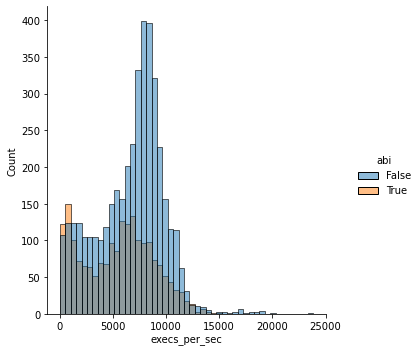

In [34]:
sns.displot(x='execs_per_sec', data=nobugs, hue='abi')

# Sereum

In [35]:
with open("../data/sereum/contracts.txt") as f:
    all_sereum_addresses = set(map(normalize_ethereum_address, f.readlines()))

In [36]:
sereum = pd.read_csv("./sereum.summary.csv")
sereum[WALLCLOCK] = sereum[WALLCLOCK].map(sanitize_wallclocktime)
sereum[WALLCLOCK] = pd.to_timedelta(sereum[WALLCLOCK])
sereum['contract'] = sereum['contract'].map(normalize_ethereum_address)
sereum

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_average_storage_size,state_average_code_size,bugs,crashes,state_max_storage_size,coverage,execs_per_sec,wall clock time (h:)m:ss.1,state_accounts,state_max_code_size,execs,bugtypes,run_unix,queue
0,0x03e0635a77ca3dbc23748af10a568663964f4bad,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x055cc48f7968fd8640ef140610dd4038e1b03926,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x06a6a7af298129e3a2ab396c9c06f91d3c54aba8,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x07e973c671b46ecc61316b2ba1941bad0072f060,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x158079ee67fce2f58472a96584a73c7ab9ac95c1,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0xfe1b613f17f984e27239b0b2dccfb1778888dfae,success,0 days 00:30:00,live-state,True,34.515385,2171.538462,NaN,NaN,3632.0,59.382423,168.759444,30:00.39,130.0,15267.0,303767.0,1.0,1800.0,276.0
343,0xfe8f39ebf15e69c1185bb31962d106c4f848800f,success,0 days 00:30:00,live-state,False,11.250000,2166.125000,NaN,NaN,52.0,34.444444,5123.163333,30:00.04,8.0,13064.0,9221694.0,1.0,1800.0,606.0
344,0xfec50e1e7ec3a262195a8801335393289059ba26,success,0 days 00:30:00,live-state,False,11.666667,7833.666667,NaN,NaN,35.0,33.689840,9726.338333,30:00.06,3.0,23501.0,17507409.0,1.0,1800.0,1380.0
345,0xff2b202d1d7ce83e62dc19b6b7d23ed9378e8f29,success,0 days 00:30:00,live-state,True,21.000000,4235.500000,NaN,NaN,37.0,59.685864,7476.016667,30:00.06,2.0,7440.0,13456830.0,1.0,1800.0,868.0


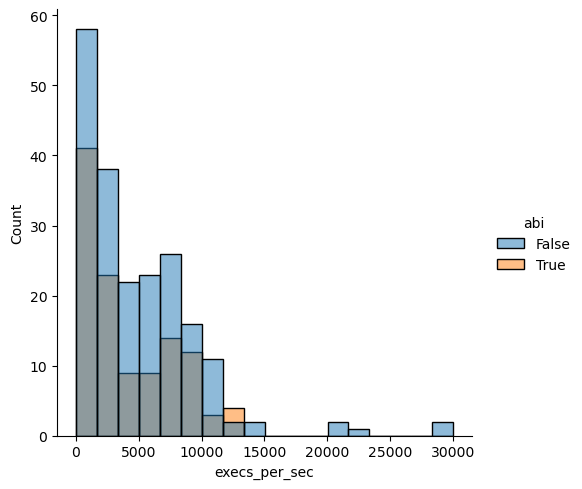

In [37]:
sns.displot(x='execs_per_sec', data=sereum, hue='abi')

In [38]:
sereum

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_average_storage_size,state_average_code_size,bugs,crashes,state_max_storage_size,coverage,execs_per_sec,wall clock time (h:)m:ss.1,state_accounts,state_max_code_size,execs,bugtypes,run_unix,queue
0,0x03e0635a77ca3dbc23748af10a568663964f4bad,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x055cc48f7968fd8640ef140610dd4038e1b03926,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x06a6a7af298129e3a2ab396c9c06f91d3c54aba8,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x07e973c671b46ecc61316b2ba1941bad0072f060,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x158079ee67fce2f58472a96584a73c7ab9ac95c1,failure,NaT,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0xfe1b613f17f984e27239b0b2dccfb1778888dfae,success,0 days 00:30:00,live-state,True,34.515385,2171.538462,NaN,NaN,3632.0,59.382423,168.759444,30:00.39,130.0,15267.0,303767.0,1.0,1800.0,276.0
343,0xfe8f39ebf15e69c1185bb31962d106c4f848800f,success,0 days 00:30:00,live-state,False,11.250000,2166.125000,NaN,NaN,52.0,34.444444,5123.163333,30:00.04,8.0,13064.0,9221694.0,1.0,1800.0,606.0
344,0xfec50e1e7ec3a262195a8801335393289059ba26,success,0 days 00:30:00,live-state,False,11.666667,7833.666667,NaN,NaN,35.0,33.689840,9726.338333,30:00.06,3.0,23501.0,17507409.0,1.0,1800.0,1380.0
345,0xff2b202d1d7ce83e62dc19b6b7d23ed9378e8f29,success,0 days 00:30:00,live-state,True,21.000000,4235.500000,NaN,NaN,37.0,59.685864,7476.016667,30:00.06,2.0,7440.0,13456830.0,1.0,1800.0,868.0


In [39]:
rebugs = sereum[~sereum['bugs'].isnull()]
rebugs

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_average_storage_size,state_average_code_size,bugs,crashes,state_max_storage_size,coverage,execs_per_sec,wall clock time (h:)m:ss.1,state_accounts,state_max_code_size,execs,bugtypes,run_unix,queue
45,0x0eb68f34efa0086e4136bca51fc4d0696580643e,success,0 days 00:00:06,live-state,False,1.000000,1091.000000,[BUG] balance gain | 3766261041232008458301473...,1.0,1.0,94.117647,30020.166667,0:06.63,1.0,1091.0,180121.0,1.0,6.0,121.0
72,0x238f99a33f6a1c78187b5b0d645cb4606aebf9e3,success,0 days 00:02:27,live-state,False,632.833333,5320.250000,[BUG] balance gain | 3766261041232008458301473...,1.0,4451.0,79.132231,110.835616,2:27.16,12.0,14823.0,16182.0,1.0,146.0,296.0
73,0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4,success,0 days 00:17:29,live-state,False,6.055556,1066.222222,[BUG] balance gain | 3766261041232008458301473...,2.0,76.0,73.913043,2929.211630,17:29.43,18.0,4237.0,3072743.0,1.0,1049.0,433.0
79,0x26b8af052895080148dabbc1007b3045f023916e,success,0 days 00:00:28,live-state,False,0.000000,559.000000,[BUG] balance gain | 3766261041232008458301473...,1.0,0.0,50.943396,14641.857143,0:28.24,1.0,559.0,409972.0,1.0,28.0,177.0
80,0x27dd8e8e687b66c4046045c7c0795743580b384e,success,0 days 00:03:41,live-state,False,1753.181818,5407.636364,[BUG] balance gain | 3766261041232008458301473...,1.0,16804.0,64.423077,39.359813,3:41.55,11.0,14822.0,8423.0,1.0,214.0,145.0
85,0x2d5df43d54ae164a912db8de092cf707b446f693,success,0 days 00:12:15,live-state,False,6.310345,1027.689655,[BUG] balance gain | 3766261041232008458301473...,1.0,116.0,74.509804,1473.016327,12:15.57,29.0,1751.0,1082667.0,1.0,735.0,343.0
96,0x3ac969b43affc4e0684dc52dc3072b109d0e348d,success,0 days 00:23:59,live-state,False,5.833333,1125.333333,[BUG] balance gain | 3766261041232008458301473...,1.0,27.0,73.972603,2399.234190,23:59.40,6.0,2048.0,3452498.0,1.0,1439.0,328.0
112,0x4122073496955adb48e9a1dfaf6e456631b595a1,success,0 days 00:26:24,live-state,False,6.321429,1019.785714,[BUG] balance gain | 3766261041232008458301473...,1.0,116.0,83.606557,1975.328283,26:24.59,28.0,1751.0,3128920.0,1.0,1584.0,479.0
124,0x469431743a71bd7a0f985ddebbefea4b31f5dfd9,success,0 days 00:16:37,live-state,False,12.666667,4818.833333,[BUG] balance gain | 3766261041232008458301473...,1.0,52.0,79.764706,1598.116349,16:37.28,6.0,20805.0,1593322.0,1.0,997.0,746.0
141,0x55791ea128a7b7fc871272d9147435a3abb3d1eb,success,0 days 00:05:19,live-state,False,6.826087,1443.173913,[BUG] balance gain | 3766261041232008458301473...,1.0,76.0,80.487805,3933.683386,5:19.10,23.0,2521.0,1254845.0,1.0,319.0,354.0


In [40]:
# honeypot contracts previously identified
set(sereum['contract']) & (set(known_honeypots['Address']))

{'0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4',
 '0x463f235748bc7862deaa04d85b4b16ac8fafef39',
 '0x95d34980095380851902ccd9a1fb4c813c2cb639',
 '0xa5d6accc5695327f65cbf38da29198df53efdcf0',
 '0xaae1f51cf3339f18b6d3f3bdc75a5facd744b0b8',
 '0xb4c05e6e4cdb07c15095300d96a5735046eef999',
 '0xb93430ce38ac4a6bb47fb1fc085ea669353fd89e',
 '0xbabfe0ae175b847543724c386700065137d30e3b',
 '0xd116d1349c1382b0b302086a4e4219ae4f8634ff',
 '0xe610af01f92f19679327715b426c35849c47c657'}

In [41]:
names = {
    # non-re bug identified - something with fees?
    0x8e597bc2e708f83ddbb74355f924397676877cde: "CryptoCarbon proxyEZC (EZC)",
    # non-re bug identified - something with fees?
    0x238f99a33f6a1c78187b5b0d645cb4606aebf9e3: 'proxyCC',
    # also non-re bug - also some issue with fees?
    0x27dd8e8e687b66c4046045c7c0795743580b384e: 'ezCoin (EZC)',
    # same
    0xe4c94d45f7aef7018a5d66f44af780ec6023378e: 'CCRB CryptoCarbon)'
}
names = {normalize_ethereum_address(k) : v for k, v in names.items()}

re_trivial = {
    0x26b8aF052895080148dabBC1007b3045f023916E,
    0x59752433dbe28f5aa59b479958689d353b3dee08,
    0x469431743a71bd7a0f985ddebbefea4b31f5dfd9,
    0x8ce53575e1ce89131b370cbed602ce8cfa4f7805,
    0xbf78025535c98f4c605fbe9eaf672999abf19dc1,
    0xf01fe1a15673a5209c94121c45e2121fe2903416,
    0x0eb68f34efa0086e4136bca51fc4d0696580643e,
    0xd654bdd32fc99471455e86c2e7f7d7b6437e9179
}
re_trivial = set(map(normalize_ethereum_address, re_trivial))
re_honeypots = {
    0xb4c05e6e4cdb07c15095300d96a5735046eef999, 
    0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4,
    0x2d5df43d54ae164a912db8de092cf707b446f693,
    0x3ac969b43affc4e0684dc52dc3072b109d0e348d,
    0x55791ea128a7b7fc871272d9147435a3abb3d1eb,
    0x591cc4e1af91ba3faa894b46342376a6142630f1,
    0x591cc4e1af91ba3faa894b46342376a6142630f1,
    0x6e3c384480e71792948c29e9fc8d7b9c9d75ae8f,
    0x7c6220c9537946a0861d7e86f6423af526f41375,
    0x83a3a9b3068911b55a3989df0e642f487d08e424,
    0x4122073496955adb48e9a1dfaf6e456631b595a1,
    0x95d34980095380851902ccd9a1fb4c813c2cb639,
    0xa4e1cbf64c3b5db2a6e6f23cb5286b97d80b86e3,
    0xa5d6accc5695327f65cbf38da29198df53efdcf0,
    0xac629878277bf6a2fc46857eac4d4dd17bfa330f,
    0xb7c5c5aa4d42967efe906e1b66cb8df9cebf04f7,
    0xcb6fe98097fe7d6e00415bb6623d5fc3effa4e83,
    0xcead721ef5b11f1a7b530171aab69b16c5e66b6e,
    0xd116d1349c1382b0b302086a4e4219ae4f8634ff,
    0xdd71e35f680bb5adc77c6d1d9ef5793598e613dc,   
    0xdf4b83a451ef20b925ce39f4da2a021722688370,
    0xe610af01f92f19679327715b426c35849c47c657,
    0xf5cff81d51e81596519ecf61830cb084037a2218,
    
    # other re honeypots
    0x463f235748bc7862deaa04d85b4b16ac8fafef39,
    0xaae1f51cf3339f18b6d3f3bdc75a5facd744b0b8,
    0xb93430ce38ac4a6bb47fb1fc085ea669353fd89e,
    
    
}
re_honeypots = set(map(normalize_ethereum_address, re_honeypots))
ignore = re_trivial.union(re_honeypots).union(set(names.keys()))

In [42]:
sereum[~sereum['bugs'].isnull() & ~sereum['contract'].isin(ignore)]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_average_storage_size,state_average_code_size,bugs,crashes,state_max_storage_size,coverage,execs_per_sec,wall clock time (h:)m:ss.1,state_accounts,state_max_code_size,execs,bugtypes,run_unix,queue


In [43]:
re_honeypots & set(known_honeypots['Address'])

{'0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4',
 '0x463f235748bc7862deaa04d85b4b16ac8fafef39',
 '0x95d34980095380851902ccd9a1fb4c813c2cb639',
 '0xa5d6accc5695327f65cbf38da29198df53efdcf0',
 '0xaae1f51cf3339f18b6d3f3bdc75a5facd744b0b8',
 '0xb4c05e6e4cdb07c15095300d96a5735046eef999',
 '0xb93430ce38ac4a6bb47fb1fc085ea669353fd89e',
 '0xd116d1349c1382b0b302086a4e4219ae4f8634ff',
 '0xe610af01f92f19679327715b426c35849c47c657'}

In [44]:
eeg_false_alarms = set(map(normalize_ethereum_address,[
    # "fathercontract" - this is an recursively implemented attack contract
    # that exploits some other flaw in a token contract. This is wrongly marked
    # as a reentrancy. The contract can also be implemented non-recursively without
    # reentering.
    0x2c4089c8bae4b9364d830755874c657401ea6e9d,
    0x516d81a212ad95e6fc9eaa586b7e12e58d5129a9,
    0x85d2b1cb300a51ccf929d109611c1301727aea0b,
]))

eeg_no_ether_gains = set(map(normalize_ethereum_address,[
    # HODLWallet - while there is a reentrancy, it is not exploitable for ether gains
    0x4a8d3a662e0fd6a8bd39ed0f91e4c1b729c81a38
]))

eeg_re = set(map(normalize_ethereum_address, [
  "0x0eb68f34efa0086e4136bca51fc4d0696580643e",
  "0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4",
  "0x26b8af052895080148dabbc1007b3045f023916e",
  "0x2c4089c8bae4b9364d830755874c657401ea6e9d",
  "0x463f235748bc7862deaa04d85b4b16ac8fafef39",
  "0x4a8d3a662e0fd6a8bd39ed0f91e4c1b729c81a38",
  "0x516d81a212ad95e6fc9eaa586b7e12e58d5129a9",
  "0x59752433dbe28f5aa59b479958689d353b3dee08",
  "0x72f60eca0db6811274215694129661151f97982e",
  "0x85d2b1cb300a51ccf929d109611c1301727aea0b",
  "0x903643251af408a3c5269c836b9a2a4a1f04d1cf",
  "0x95d34980095380851902ccd9a1fb4c813c2cb639",
  "0xa5d6accc5695327f65cbf38da29198df53efdcf0",
  "0xaae1f51cf3339f18b6d3f3bdc75a5facd744b0b8",
  "0xb4c05e6e4cdb07c15095300d96a5735046eef999",
  "0xb7c5c5aa4d42967efe906e1b66cb8df9cebf04f7",
  "0xb93430ce38ac4a6bb47fb1fc085ea669353fd89e",
  "0xbf78025535c98f4c605fbe9eaf672999abf19dc1",
  "0xd116d1349c1382b0b302086a4e4219ae4f8634ff",
  "0xd2e16a20dd7b1ae54fb0312209784478d069c7b0",
  "0xd4cd7c881f5ceece4917d856ce73f510d7d0769e",
  "0xd654bdd32fc99471455e86c2e7f7d7b6437e9179",
  "0xe610af01f92f19679327715b426c35849c47c657",
  "0xf01fe1a15673a5209c94121c45e2121fe2903416",
  "0xf91546835f756da0c10cfa0cda95b15577b84aa7",
  "0xfe1b613f17f984e27239b0b2dccfb1778888dfae"
]))

eeg_interesting = eeg_re - ignore - eeg_false_alarms - eeg_no_ether_gains
eeg_interesting

{'0x72f60eca0db6811274215694129661151f97982e',
 '0x903643251af408a3c5269c836b9a2a4a1f04d1cf',
 '0xd2e16a20dd7b1ae54fb0312209784478d069c7b0',
 '0xd4cd7c881f5ceece4917d856ce73f510d7d0769e',
 '0xf91546835f756da0c10cfa0cda95b15577b84aa7',
 '0xfe1b613f17f984e27239b0b2dccfb1778888dfae'}

* 0x4a8d3a662e0fd6a8bd39ed0f91e4c1b729c81a38 - HodlWallet
* 0x72f60eca0db6811274215694129661151f97982e - DecentralizedExchanges
    * 0xd4cd7c881f5ceece4917d856ce73f510d7d0769e - DecentralizedExchanges (basically a code clone with a minor difference)
* 0x903643251af408a3c5269c836b9a2a4a1f04d1cf - SysEscrow
* 0xd2e16a20dd7b1ae54fb0312209784478d069c7b0 - ManagedAccount (TheDAO related)
* 0xf91546835f756da0c10cfa0cda95b15577b84aa7 - Spankchain Ledgerchannel
* 0xfe1b613f17f984e27239b0b2dccfb1778888dfae - InstaDice

In [45]:
eeg_interesting - set(sereum['contract'])

{'0xd2e16a20dd7b1ae54fb0312209784478d069c7b0'}

In [46]:
rebugs = sereum[sereum['contract'].isin(eeg_interesting)]
rebugs

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_average_storage_size,state_average_code_size,bugs,crashes,state_max_storage_size,coverage,execs_per_sec,wall clock time (h:)m:ss.1,state_accounts,state_max_code_size,execs,bugtypes,run_unix,queue
171,0x72f60eca0db6811274215694129661151f97982e,success,0 days 00:30:00,live-state,False,1049.666667,2733.333333,NaN,NaN,3128.0,32.539683,539.049444,30:00.19,3.0,5965.0,970289.0,1.0,1800.0,285.0
215,0x903643251af408a3c5269c836b9a2a4a1f04d1cf,success,0 days 00:30:00,live-state,True,4.000000,1563.500000,NaN,NaN,7.0,80.219780,12058.146667,30:00.03,2.0,2494.0,21704664.0,1.0,1800.0,689.0
296,0xd4cd7c881f5ceece4917d856ce73f510d7d0769e,success,0 days 00:30:00,live-state,True,1396.000000,1671.666667,NaN,NaN,3128.0,31.640625,596.134444,30:00.22,9.0,6105.0,1073042.0,1.0,1800.0,440.0
336,0xf91546835f756da0c10cfa0cda95b15577b84aa7,success,0 days 00:30:00,live-state,True,1782.000000,10241.500000,NaN,NaN,3564.0,26.693227,364.916667,30:00.21,2.0,17133.0,656850.0,1.0,1800.0,253.0
342,0xfe1b613f17f984e27239b0b2dccfb1778888dfae,success,0 days 00:30:00,live-state,True,34.515385,2171.538462,NaN,NaN,3632.0,59.382423,168.759444,30:00.39,130.0,15267.0,303767.0,1.0,1800.0,276.0


### Notes on 0xfe1b613f17f984e27239b0b2dccfb1778888dfae - InstaDice

first attack according to eeg:
https://etherscan.io/tx/0x6bc3f389a11dfe6bc6d4d0548a8f8770242a30c23c46fedfadf3bbfe37468691
in block number 5601861 

so analyze based on state of 5601860?

However, first internal tx from attacker contract to InstaDice is at block 5601846



### Notes on DecentralizedExchanges

* 0x72f60eca0db6811274215694129661151f97982e
* 0xd4cd7c881f5ceece4917d856ce73f510d7d0769e




# Sailfish DAO

In [47]:
with open("../data/sailfish-dao/sailfish.dao.fp") as f:
    sailfish_fp = set(map(normalize_ethereum_address, map(str.strip, f.readlines())))
with open("../data/sailfish-dao/sailfish.dao.tn") as f:
    sailfish_tn = set(map(normalize_ethereum_address, map(str.strip, f.readlines())))
with open("../data/sailfish-dao/sailfish.dao.tp") as f:
    sailfish_tp = set(map(normalize_ethereum_address, map(str.strip, f.readlines())))

with open("../data/sailfish-0days/contracts.txt") as f:
    sailfish_0days = set(map(normalize_ethereum_address, map(str.strip, f.readlines())))

In [48]:
sailfishdao = pd.read_csv("./sailfish-dao.csv")
sailfishdao[WALLCLOCK] = sailfishdao[WALLCLOCK].map(sanitize_wallclocktime)
sailfishdao[WALLCLOCK] = pd.to_timedelta(sailfishdao[WALLCLOCK])
sailfishdao['contract'] = sailfishdao['contract'].map(normalize_ethereum_address)
sailfishdao

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_accounts,wall clock time (h:)m:ss.1,execs_per_sec,state_max_storage_size,run_unix,queue,coverage,bugtypes,state_average_code_size,state_average_storage_size,execs,crashes,bugs,state_max_code_size
0,0x29789c9abebc185f1876af10c38ee47ee0c6ed48,failure,0 days 00:00:00,live-state,True,NaN,0:00.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xe9e046192a2ff2c2e4d1fe6ae6579279d50a83d3,failure,0 days 00:00:00,live-state,True,4.0,0:00.34,NaN,255453.0,NaN,NaN,NaN,NaN,4005.750000,78580.500000,NaN,NaN,NaN,5267.0
2,0x0000000000004946c0e9f43f4dee607b0ef1fa1c,success,0 days 00:30:00,live-state,True,1.0,30:00.06,255.520556,0.0,1800.0,205.0,77.300613,1.0,3340.000000,0.000000,459937.0,NaN,NaN,3340.0
3,0x0000010d23ccfee520c3fb5a5ba9679cb9d83cbe,success,0 days 00:30:00,live-state,True,1.0,30:00.07,8332.088333,0.0,1800.0,724.0,61.702128,1.0,5583.000000,0.000000,14997759.0,NaN,NaN,5583.0
4,0x0039019392b1ea93cd1277f75986fdf2407fe254,success,0 days 00:30:00,live-state,True,4.0,30:00.29,388.621667,6832.0,1800.0,325.0,48.056537,1.0,3083.250000,1709.500000,699519.0,NaN,NaN,8623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0xfe056d5c08c349beabc0369b79319636b0bf5d94,success,0 days 00:30:00,live-state,True,1.0,30:00.06,1743.078889,0.0,1800.0,802.0,66.003976,1.0,10856.000000,0.000000,3137542.0,NaN,NaN,10856.0
1900,0xfe562aa834fa922c5266fd361e43dbab354d04da,success,0 days 00:30:00,live-state,True,1.0,30:00.10,10472.306111,0.0,1800.0,550.0,71.865121,1.0,20029.000000,0.000000,18850151.0,NaN,NaN,20029.0
1901,0xfe6e165757786bf49d121989f2fb6f3fa325bcef,success,0 days 00:30:00,live-state,True,1.0,30:00.06,8275.250000,0.0,1800.0,1078.0,59.497207,1.0,6675.000000,0.000000,14895450.0,NaN,NaN,6675.0
1902,0xfe878b9e30eaf414fcb6c4d89e3df8a7e094ee4a,success,0 days 00:30:00,live-state,True,1.0,30:00.09,14119.246111,0.0,1800.0,1651.0,58.937198,1.0,7783.000000,0.000000,25414643.0,NaN,NaN,7783.0


In [49]:
len(set(sailfishdao['contract']))

1904

In [50]:
sailfishdao[sailfishdao['crashes'] > 0]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_accounts,wall clock time (h:)m:ss.1,execs_per_sec,state_max_storage_size,run_unix,queue,coverage,bugtypes,state_average_code_size,state_average_storage_size,execs,crashes,bugs,state_max_code_size
49,0x06df142f76ae6efb9025779f58f1e109dce402f0,success,0 days 00:03:06,live-state,True,3.0,3:06.71,11940.806452,92.0,186.0,333.0,85.245902,1.0,3444.0,34.666667,2220990.0,1.0,[BUG] balance gain | 3766261041232008458301473...,5652.0
57,0x07678e4c603a26e92962b6e547df99929b708baa,success,0 days 00:01:20,live-state,True,1.0,1:20.89,11136.450000,11.0,80.0,370.0,80.300188,1.0,16818.0,11.000000,890916.0,1.0,[BUG] balance gain | 3766261041232008458301473...,16818.0
123,0x0eb68f34efa0086e4136bca51fc4d0696580643e,success,0 days 00:00:10,live-state,True,1.0,0:10.20,17482.200000,1.0,10.0,125.0,94.117647,1.0,1091.0,1.000000,174822.0,2.0,[BUG] balance gain | 3766261041232008458301473...,1091.0
138,0x11dd9792020dd93e62ce303f6b50ab0537f7ba43,success,0 days 00:00:11,live-state,True,5.0,0:11.10,31238.636364,0.0,11.0,201.0,70.231214,1.0,7421.4,0.000000,343625.0,1.0,[BUG] balance gain | 3766261041232008458301473...,11442.0
171,0x15deb30754babe5c25f11b56d2e29aad19c9d4f8,success,0 days 00:02:31,live-state,True,1.0,2:31.05,13927.105960,4.0,151.0,416.0,74.336283,1.0,2273.0,4.000000,2102993.0,1.0,[BUG] balance gain | 3766261041232008458301473...,2273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,0xe9ee5906060553ab83eba30f6b67623bf93e8cdc,success,0 days 00:00:00,live-state,True,2.0,0:00.65,12220.000000,0.0,0.0,42.0,64.018692,1.0,3232.0,0.000000,12220.0,1.0,[BUG] controlled selfdestruct | selfdestruct t...,5288.0
1824,0xefc9ba892c557ff541947116040cbb669b5c0a35,success,0 days 00:00:00,live-state,True,3.0,0:00.85,12289.000000,3.0,0.0,71.0,53.658537,1.0,1815.0,1.000000,12289.0,1.0,[BUG] balance gain | 3766261041232008458301473...,5445.0
1837,0xef037dffc5f912c397daad411c145fb1942759f0,success,0 days 00:00:00,live-state,True,1.0,0:00.66,8397.000000,0.0,0.0,43.0,64.864865,1.0,4829.0,0.000000,8397.0,7.0,[BUG] controlled delegatecall | DELEGATECALL t...,4829.0
1845,0xf218f90c71bb03c23ca1d88f57fb2cf256176ad5,success,0 days 00:00:00,live-state,True,1.0,0:00.86,16695.000000,0.0,0.0,74.0,18.981481,1.0,9456.0,0.000000,16695.0,1.0,[BUG] balance gain | 3766261041232008458301473...,9456.0


In [51]:
len(set(sailfishdao[sailfishdao['crashes'] > 0]['contract']))

67

In [52]:
q = sailfishdao[
    (sailfishdao['crashes'] > 0) & 
    (sailfishdao['bugs'].str.match(".*balance gain.*"))
]
len(set(q['contract'])), len(set(sailfishdao[sailfishdao['crashes'] > 0]['contract']))- len(set(q['contract']))

(59, 8)

In [53]:
sailfishdaotp = pd.read_csv("./sailfish-dao-tp.csv")
sailfishdaotp[WALLCLOCK] = sailfishdaotp[WALLCLOCK].map(sanitize_wallclocktime)
sailfishdaotp[WALLCLOCK] = pd.to_timedelta(sailfishdaotp[WALLCLOCK])
sailfishdaotp['contract'] = sailfishdaotp['contract'].map(normalize_ethereum_address)
sailfishdaotp

,contract,status,wall clock time (h:)m:ss,input-type,abi,execs,wall clock time (h:)m:ss.1,coverage,execs_per_sec,queue,bugtypes,crashes,run_unix,bugs
0,0x03c18d649e743ee0b09f28a81d33575f03af9826,success,0 days 00:25:00,NaN,True,44083608.0,25:00.10,62.857143,29389.072000,1195,1,NaN,1500.0,NaN
1,0x03c18d649e743ee0b09f28a81d33575f03af9826,success,0 days 00:25:00,NaN,True,19535852.0,25:00.08,62.857143,13023.901333,829,1,NaN,1500.0,NaN
2,0x03c18d649e743ee0b09f28a81d33575f03af9826,success,0 days 00:20:00,NaN,True,23967044.0,20:00.10,62.698413,19972.536667,787,1,NaN,1200.0,NaN
3,0x1257f00e0333d7c9f9c87abf1dce6e373a6492f6,success,0 days 00:25:00,NaN,True,50016583.0,25:00.03,63.636364,33344.388667,455,1,NaN,1500.0,NaN
4,0x1257f00e0333d7c9f9c87abf1dce6e373a6492f6,success,0 days 00:25:00,NaN,True,58401616.0,25:00.05,63.636364,38934.410667,429,1,NaN,1500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0xf6e7ec5d6983fafd6eb14c2a20c2dd354e09ce9b,success,0 days 00:00:32,NaN,True,1163060.0,0:32.75,89.682540,36345.625000,196,1,1.0,32.0,[BUG] balance gain | 1 wei (compare total 3766...
74,0xf6e7ec5d6983fafd6eb14c2a20c2dd354e09ce9b,success,0 days 00:00:26,NaN,True,886443.0,0:26.99,83.333333,34093.961538,238,1,1.0,26.0,[BUG] balance gain | 1 wei (compare total 3766...
75,0xfe2a80103c9037354a04094972fc7ecab747272b,success,0 days 00:20:00,NaN,True,38356254.0,20:00.08,60.000000,31963.545000,606,1,NaN,1200.0,NaN
76,0xfe2a80103c9037354a04094972fc7ecab747272b,success,0 days 00:25:00,NaN,True,40475506.0,25:00.04,60.000000,26983.670667,618,1,NaN,1500.0,NaN


In [54]:
efcf_findings = set(sailfishdao[sailfishdao['crashes'] > 0]['contract'])
len(efcf_findings)

67

In [55]:
len(sailfish_fp) + len(sailfish_tp)

37

In [56]:
efcf_findings & sailfish_tp

{'0x463f235748bc7862deaa04d85b4b16ac8fafef39',
 '0x69640f28b6fe4ae4674efdbe21aa15d048bb914b',
 '0xe610af01f92f19679327715b426c35849c47c657',
 '0xf6e7ec5d6983fafd6eb14c2a20c2dd354e09ce9b'}

In [57]:
(efcf_findings & sailfish_tp) - re_honeypots

{'0x69640f28b6fe4ae4674efdbe21aa15d048bb914b',
 '0xf6e7ec5d6983fafd6eb14c2a20c2dd354e09ce9b'}

In [58]:
efcf_findings & sailfish_fp

set()

In [59]:
efcf_findings & sailfish_tn

set()

In [60]:
print("\n".join(sorted(list(sailfish_tp - efcf_findings))))

0x03c18d649e743ee0b09f28a81d33575f03af9826
0x1257f00e0333d7c9f9c87abf1dce6e373a6492f6
0x2880f03f181ee0967a00bac5346574f58f91b615
0x2ad1ce69ea75a79f6070394a1b712db14965e3b4
0x2d52d1517f47e1ab7be6377a1f11fbd2c49978db
0x3ad4fad3ce0509475e5b4f597c53cba38873cc46
0x3b1c6004e43bf49c521eb382dec02e6c3ff5272a
0x5ab2e3f693e6961beea08c1db8a3602fcea6b36f
0x6c1bcb34142bffd35f57db626e0ac427af616a4d
0x7b203459eb87fbf70ca42624b4304dc24ede9c50
0x8b168e46281e72d410717b27a6ca97bf9f301173
0xa395480a4a90c7066c8ddb5db83e2718e750641c
0xaa12936a79848938770bdbc5da0d49fe986678cc
0xb29405833e303db3193cf7c058e2c81ef027c6c8
0xbd10c70e94aca5c0b9eb434a62f2d8444ec0649d
0xc477042db387dd59c038ca4b829a07964b674347
0xcc1a13b76270a20a78f3bef434bdeb4a5eec6a31
0xd022969da8a1ace11e2974b3e7ee476c3f9f99c6
0xd37e1d4509838d65873609158d1471627f697874
0xdd1d5ce9f8e26a3f768b1c1e5c68db10a05d5fc0
0xef86db910c71ffa3c80233bc9108dc51ad1e008a
0xfe2a80103c9037354a04094972fc7ecab747272b


In [61]:
sailfish_tp_nonexploitable = set(map(normalize_ethereum_address, [
    # trivial contract. not sure what it does. seems unused/unexploitable.
    0x1257F00e0333d7c9F9c87aBF1DCE6e373A6492F6,
    0xc477042db387DD59C038Ca4b829a07964b674347,
]))

In [62]:
sailfishdao[sailfishdao['contract'] == normalize_ethereum_address('0x1257F00e0333d7c9F9c87aBF1DCE6e373A6492F6')]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_accounts,wall clock time (h:)m:ss.1,execs_per_sec,state_max_storage_size,run_unix,queue,coverage,bugtypes,state_average_code_size,state_average_storage_size,execs,crashes,bugs,state_max_code_size
143,0x1257f00e0333d7c9f9c87abf1dce6e373a6492f6,success,0 days 00:30:00,live-state,True,2.0,30:00.06,7371.380556,1.0,1800.0,402.0,63.636364,1.0,393.0,0.5,13268485.0,NaN,NaN,786.0


In [63]:
sailfishdao[sailfishdao['contract'] == normalize_ethereum_address(0xA395480A4A90c7066c8ddB5db83E2718E750641C)]

,contract,status,wall clock time (h:)m:ss,input-type,abi,state_accounts,wall clock time (h:)m:ss.1,execs_per_sec,state_max_storage_size,run_unix,queue,coverage,bugtypes,state_average_code_size,state_average_storage_size,execs,crashes,bugs,state_max_code_size
1190,0xa395480a4a90c7066c8ddb5db83e2718e750641c,success,0 days 00:30:00,live-state,True,1.0,30:00.06,5699.175556,2.0,1800.0,346.0,61.643836,1.0,1620.0,2.0,10258516.0,NaN,NaN,1620.0


In [64]:
efcf_findings = set(sailfishdaotp[sailfishdaotp['crashes'] > 0]['contract'])
print(len(efcf_findings))
print("\n".join(sorted(list(sailfish_tp - efcf_findings))))

4
0x03c18d649e743ee0b09f28a81d33575f03af9826
0x1257f00e0333d7c9f9c87abf1dce6e373a6492f6
0x2880f03f181ee0967a00bac5346574f58f91b615
0x2ad1ce69ea75a79f6070394a1b712db14965e3b4
0x2d52d1517f47e1ab7be6377a1f11fbd2c49978db
0x3ad4fad3ce0509475e5b4f597c53cba38873cc46
0x3b1c6004e43bf49c521eb382dec02e6c3ff5272a
0x5ab2e3f693e6961beea08c1db8a3602fcea6b36f
0x6c1bcb34142bffd35f57db626e0ac427af616a4d
0x7b203459eb87fbf70ca42624b4304dc24ede9c50
0x8b168e46281e72d410717b27a6ca97bf9f301173
0xa395480a4a90c7066c8ddb5db83e2718e750641c
0xaa12936a79848938770bdbc5da0d49fe986678cc
0xb29405833e303db3193cf7c058e2c81ef027c6c8
0xbd10c70e94aca5c0b9eb434a62f2d8444ec0649d
0xc477042db387dd59c038ca4b829a07964b674347
0xcc1a13b76270a20a78f3bef434bdeb4a5eec6a31
0xd022969da8a1ace11e2974b3e7ee476c3f9f99c6
0xd37e1d4509838d65873609158d1471627f697874
0xdd1d5ce9f8e26a3f768b1c1e5c68db10a05d5fc0
0xef86db910c71ffa3c80233bc9108dc51ad1e008a
0xfe2a80103c9037354a04094972fc7ecab747272b


## Uniswap/IMBTC 


In [65]:
def timeoutput_to_pd(s):    
    t = s.strip().split("\n")
    t = map(str.strip, t)
    t = map(lambda l: l.split("): ")[1], t)
    t = map(sanitize_wallclocktime, t)
    t = list(t)
    t = pd.to_timedelta(t)
    t = pd.DataFrame(t)
    return t


In [68]:
unitimes = """
        Elapsed (wall clock) time (h:mm:ss or m:ss): 40:10.08
        Elapsed (wall clock) time (h:mm:ss or m:ss): 7:05:55
        Elapsed (wall clock) time (h:mm:ss or m:ss): 1:28:24
        Elapsed (wall clock) time (h:mm:ss or m:ss): 31:13.66
        Elapsed (wall clock) time (h:mm:ss or m:ss): 2:10:06
        Elapsed (wall clock) time (h:mm:ss or m:ss): 5:08:38
        Elapsed (wall clock) time (h:mm:ss or m:ss): 3:01:11
        Elapsed (wall clock) time (h:mm:ss or m:ss): 47:59:40
        Elapsed (wall clock) time (h:mm:ss or m:ss): 28:24.75
        Elapsed (wall clock) time (h:mm:ss or m:ss): 39:24.86
"""
unitimes = timeoutput_to_pd(unitimes)
unitimes.describe()

,0
count,10
mean,0 days 06:55:02.600000
std,0 days 14:35:52.333882415
min,0 days 00:28:24
25%,0 days 00:39:35.500000
50%,0 days 01:49:01
75%,0 days 04:36:17.500000
max,1 days 23:59:04


In [67]:
uniseededtimes = """
        Elapsed (wall clock) time (h:mm:ss or m:ss): 54:56.73
        Elapsed (wall clock) time (h:mm:ss or m:ss): 19:38:43
        Elapsed (wall clock) time (h:mm:ss or m:ss): 1:29:32
        Elapsed (wall clock) time (h:mm:ss or m:ss): 43:15.74
        Elapsed (wall clock) time (h:mm:ss or m:ss): 47:59:49
        Elapsed (wall clock) time (h:mm:ss or m:ss): 4:46:41
        Elapsed (wall clock) time (h:mm:ss or m:ss): 47:59:55
        Elapsed (wall clock) time (h:mm:ss or m:ss): 47:59:34
        Elapsed (wall clock) time (h:mm:ss or m:ss): 52:55.98
"""
uniseededtimes = timeoutput_to_pd(uniseededtimes)
uniseededtimes.describe()

,0
count,9
mean,0 days 19:09:03.222222222
std,0 days 22:24:52.327906340
min,0 days 00:43:15
25%,0 days 00:54:56
50%,0 days 04:46:04
75%,1 days 23:59:03
max,1 days 23:59:05
